# HW1

In [121]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from skimage import io
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### hyperparameters

In [102]:
batch_size = 4
num_classes = 2
epochs = 10

### preparing train, test data

In [128]:
def read_images(path, label=1, display=True):
    data = []
    for img in os.listdir(path):
        data.append(io.imread(path + '/' + img, as_grey=True).reshape(1024) / 255)
    return data, [label] * len(data)

In [129]:
def compile_set(path, label):    
    x_train, y_train = read_images(path + '/train', label)
    x_dev, y_dev = read_images(path + '/dev', label)
    x_test, y_test = read_images(path + '/test', label)
    return {'train': (x_train, y_train),
            'dev': (x_dev, y_dev),
            'test': (x_test, y_test)}

In [130]:
phone_set = compile_set('phone_dataset', label=0)
hammer_set = compile_set('hammer_dataset', label=1)

x_train = np.array(phone_set['train'][0] + hammer_set['train'][0])
y_train = np.array(phone_set['train'][1] + hammer_set['train'][1])

x_dev = np.array(phone_set['dev'][0] + hammer_set['dev'][0])
y_dev = np.array(phone_set['dev'][1] + hammer_set['dev'][1])

x_test = np.array(phone_set['test'][0] + hammer_set['test'][0])
y_test = np.array(phone_set['test'][1] + hammer_set['test'][1])

print(x_train.shape[0], 'train samples')
print(x_dev.shape[0], 'development samples')
print(x_test.shape[0], 'test samples')

20 train samples
4 development samples
4 test samples


### displaying data

Sample Nokia pic


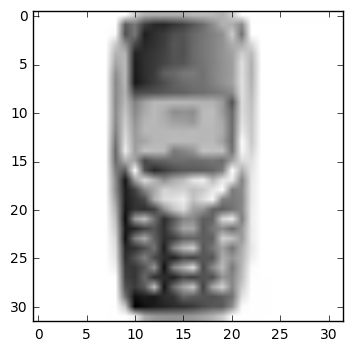

Sample hammer pic


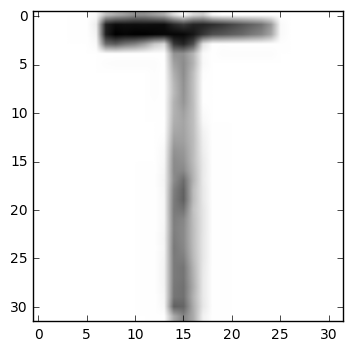

In [131]:
print("Sample Nokia pic")
img = mpimg.imread('phone_dataset/train/nokia1.png')
imgplot = plt.imshow(-img, cmap=pyplot.cm.binary)
plt.show()

print("Sample hammer pic")
img = mpimg.imread('hammer_dataset/train/hammer1.png')
imgplot = plt.imshow(-img, cmap=pyplot.cm.binary)
plt.show()

### neural network classifier

In [132]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(1024,)))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 129       
Total params: 131,329
Trainable params: 131,329
Non-trainable params: 0
_________________________________________________________________


### training the net

In [138]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_dev, y_dev))

Train on 20 samples, validate on 4 samples
Epoch 1/10
20/20 [==============================] - 0s 1ms/step - loss: 0.1152 - acc: 1.0000 - val_loss: 0.5927 - val_acc: 0.7500
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 0.1702 - acc: 0.9500 - val_loss: 0.2766 - val_acc: 0.7500
Epoch 3/10
20/20 [==============================] - 0s 1ms/step - loss: 0.1396 - acc: 1.0000 - val_loss: 0.3345 - val_acc: 0.7500
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 0.1236 - acc: 1.0000 - val_loss: 0.4462 - val_acc: 0.7500
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.0913 - acc: 1.0000 - val_loss: 0.3235 - val_acc: 0.7500
Epoch 6/10
20/20 [==============================] - 0s 1ms/step - loss: 0.1241 - acc: 1.0000 - val_loss: 0.1964 - val_acc: 1.0000
Epoch 7/10
20/20 [==============================] - 0s 1ms/step - loss: 0.0917 - acc: 1.0000 - val_loss: 0.2866 - val_acc: 0.7500
Epoch 8/10
20/20 [=============================

### accuracy on development set

In [139]:
score = model.evaluate(x_dev, y_dev, verbose=0)
print('Dev loss:', score[0])
print('Dev accuracy:', score[1])

Dev loss: 0.24007916450500488
Dev accuracy: 1.0


### accuracy on test set

In [140]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1607813537120819
Test accuracy: 1.0
